In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline



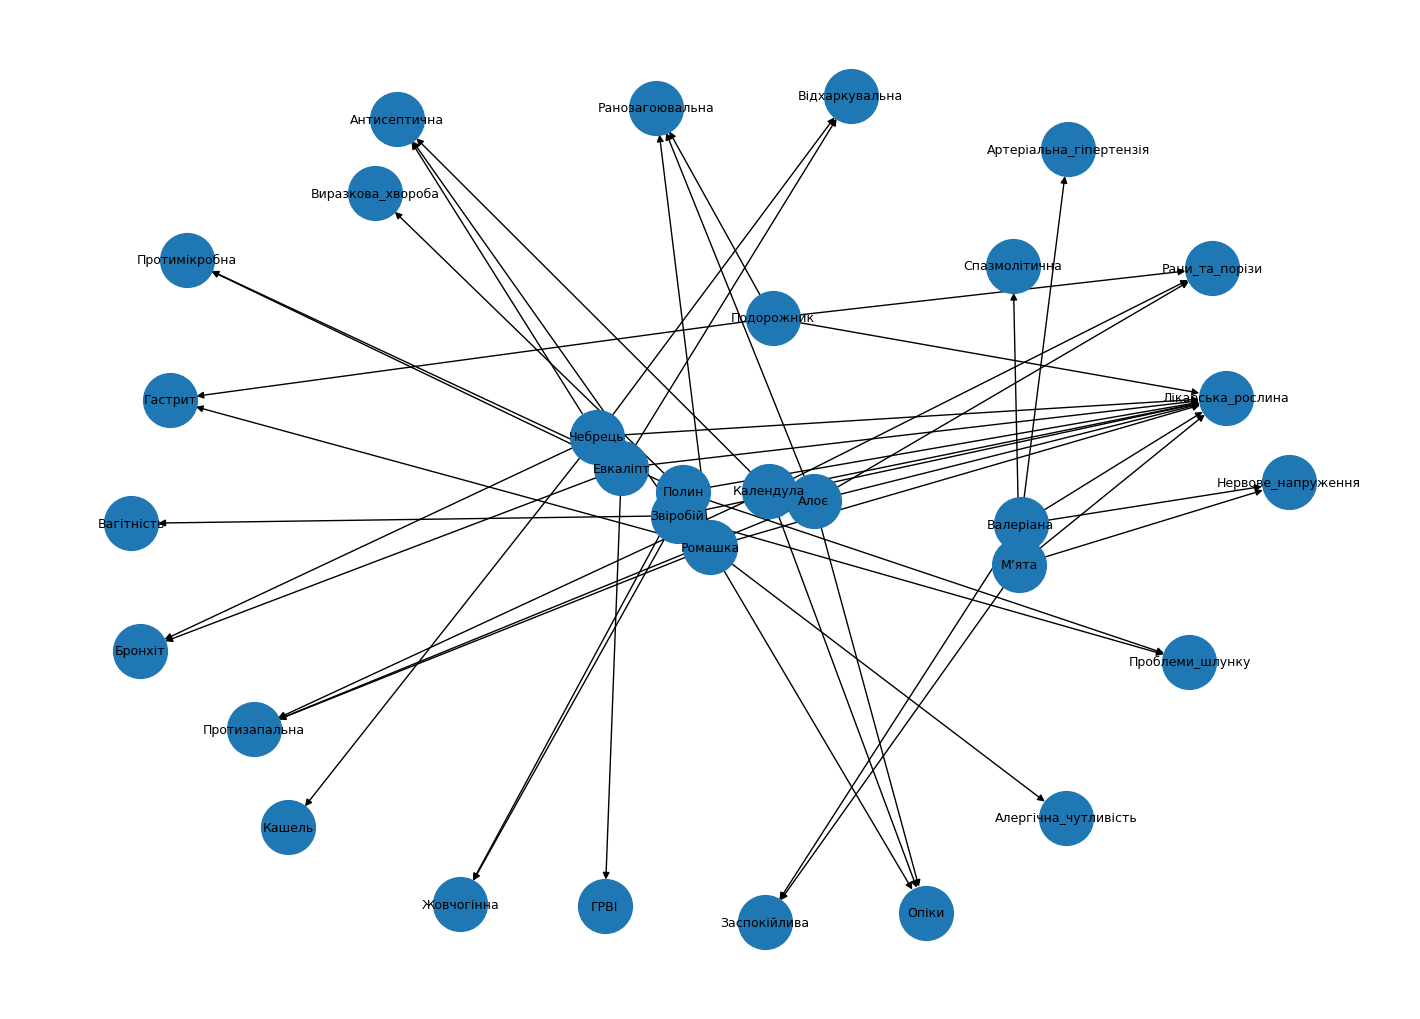

In [10]:
# --- Створення графу ---
G = nx.DiGraph()

# Додаємо зв'язки (функція-допоміжник)
def add(rel, a, b):
    G.add_edge(a, b, relation=rel)

# Список лікарських рослин
plants = [
    "Ромашка", "Календула", "Звіробій", "Подорожник", "Полин",
    "М’ята", "Валеріана", "Чебрець", "Алоє", "Евкаліпт"
]

# Кожна рослина належить до класу "Лікарська_рослина"
for p in plants:
    add("is_a", p, "Лікарська_рослина")

# Зв'язки: властивості, лікування, протипоказання
relations = [
    ("Ромашка", "Протизапальна", "has_property"),
    ("Ромашка", "Ранозагоювальна", "has_property"),
    ("Ромашка", "Гастрит", "treats"),
    ("Ромашка", "Опіки", "treats"),
    ("Ромашка", "Алергічна_чутливість", "contraindicated_for"),

    ("Календула", "Протизапальна", "has_property"),
    ("Календула", "Антисептична", "has_property"),
    ("Календула", "Рани_та_порізи", "treats"),
    ("Календула", "Опіки", "treats"),

    ("Звіробій", "Антисептична", "has_property"),
    ("Звіробій", "Жовчогінна", "has_property"),
    ("Звіробій", "Проблеми_шлунку", "treats"),
    ("Звіробій", "Вагітність", "contraindicated_for"),

    ("Подорожник", "Ранозагоювальна", "has_property"),
    ("Подорожник", "Рани_та_порізи", "treats"),
    ("Подорожник", "Гастрит", "treats"),

    ("Полин", "Жовчогінна", "has_property"),
    ("Полин", "Протимікробна", "has_property"),
    ("Полин", "Проблеми_шлунку", "treats"),
    ("Полин", "Виразкова_хвороба", "contraindicated_for"),

    ("М’ята", "Спазмолітична", "has_property"),
    ("М’ята", "Заспокійлива", "has_property"),
    ("М’ята", "Нервове_напруження", "treats"),

    ("Валеріана", "Заспокійлива", "has_property"),
    ("Валеріана", "Нервове_напруження", "treats"),
    ("Валеріана", "Артеріальна_гіпертензія", "treats"),

    ("Чебрець", "Відхаркувальна", "has_property"),
    ("Чебрець", "Антисептична", "has_property"),
    ("Чебрець", "Кашель", "treats"),
    ("Чебрець", "Бронхіт", "treats"),

    ("Алоє", "Ранозагоювальна", "has_property"),
    ("Алоє", "Протизапальна", "has_property"),
    ("Алоє", "Опіки", "treats"),
    ("Алоє", "Рани_та_порізи", "treats"),

    ("Евкаліпт", "Протимікробна", "has_property"),
    ("Евкаліпт", "Відхаркувальна", "has_property"),
    ("Евкаліпт", "Бронхіт", "treats"),
    ("Евкаліпт", "ГРВІ", "treats"),
]

for a, b, r in relations:
    add(r, a, b)

# --- Функції запитів ---
def get_properties(plant):
    return [t for t in G.successors(plant) if G[plant][t]["relation"] == "has_property"]

def treats(plant):
    return [t for t in G.successors(plant) if G[plant][t]["relation"] == "treats"]

def find_plants_for(condition):
    return [p for p in G.predecessors(condition) if G[p][condition]["relation"] == "treats"]

def find_similar_plants(p1, p2):
    """Повертає множину спільних властивостей між двома рослинами (intersect за has_property)."""
    props1 = set(get_properties(p1))
    props2 = set(get_properties(p2))
    return props1.intersection(props2)
# --- Візуалізація графа ---
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=9)
plt.show()

In [11]:
print("Властивості Алоє:", get_properties("Алоє"))
print("Що лікує Чебрець:", treats("Чебрець"))
print("Які рослини лікують Гастрит:", find_plants_for("Гастрит"))
print("Спільні властивості Ромашки і Календули:", find_similar_plants("Ромашка", "Календула"))


Властивості Алоє: ['Ранозагоювальна', 'Протизапальна']
Що лікує Чебрець: ['Кашель', 'Бронхіт']
Які рослини лікують Гастрит: ['Ромашка', 'Подорожник']
Спільні властивості Ромашки і Календули: {'Протизапальна'}
